# My First Notebook


In [5]:
print("Hello World!")

Hello World!


# Product Analysis

In [6]:
import pandas as pd

data = {
    'Product_ID': range(101, 111),
    'Product_Name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Price': [10, 20, 15, 18, 22, 25, 19, 17, 21, 16],
    'Stock': [50, 60, 30, 40, 55, 65, 35, 45, 50, 60]
}

df = pd.DataFrame(data)
print(df)


   Product_ID Product_Name  Price  Stock
0         101            A     10     50
1         102            B     20     60
2         103            C     15     30
3         104            D     18     40
4         105            E     22     55
5         106            F     25     65
6         107            G     19     35
7         108            H     17     45
8         109            I     21     50
9         110            J     16     60


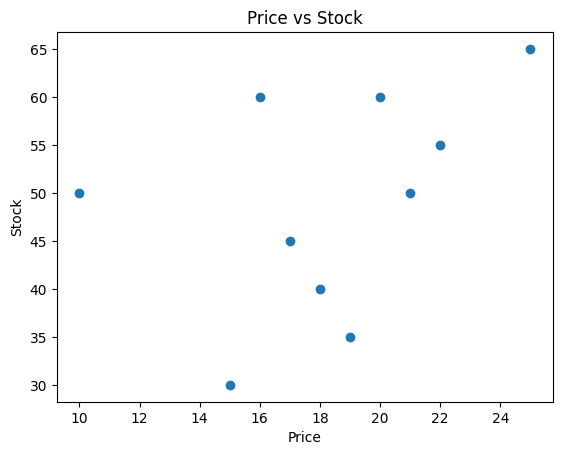

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df['Price'], df['Stock'])
plt.xlabel('Price')
plt.ylabel('Stock')
plt.title('Price vs Stock')
plt.show()